In [3]:
from pyopenms import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

os.chdir('data/')

In [6]:
glob.glob('features_pre/*featureXML')

['features_pre/2_pre_M_A.featureXML',
 'features_pre/13_pre_M_A_neg.featureXML',
 'features_pre/8_pre_M_A.featureXML',
 'features_pre/10_pre_F_A_neg.featureXML',
 'features_pre/5_pre_M_A.featureXML',
 'features_pre/5_pre_M_A_neg.featureXML',
 'features_pre/9_pre_M_A_neg.featureXML']

In [7]:
glob.glob('features_post/*featureXML')

['features_post/12_post_M_A.featureXML',
 'features_post/8_post_M_A_neg.featureXML',
 'features_post/13_post_M_A_neg.featureXML',
 'features_post/13_post_M_A.featureXML',
 'features_post/11_post_M_A_neg.featureXML',
 'features_post/5_post_M_A_neg.featureXML',
 'features_post/5_post_M_A.featureXML',
 'features_post/2_post_M_A.featureXML',
 'features_post/9_post_M_A_neg.featureXML']

In [7]:
glob.glob('QC/*featureXML')

['QC/QC_A_neg.featureXML', 'QC/QC_A.featureXML']

In [9]:
xd = pd.read_csv("DEVSET U RPOS xcms.csv")
xd.head()

,Unnamed: 0,mz,mzmin,mzmax,rt,rtmin,rtmax,npeaks,mzML,PipelineTesting_RPOS_ToF10_B1E1_SR,...,PipelineTesting_RPOS_ToF10_U1W85,PipelineTesting_RPOS_ToF10_U1W86,PipelineTesting_RPOS_ToF10_U1W87,PipelineTesting_RPOS_ToF10_U1W88,PipelineTesting_RPOS_ToF10_U1W89,PipelineTesting_RPOS_ToF10_U1W90,PipelineTesting_RPOS_ToF10_U1W91,PipelineTesting_RPOS_ToF10_U1W92,PipelineTesting_RPOS_ToF10_U1W95_LTR,PipelineTesting_RPOS_ToF10_U1W96_SR
0,1,257.146733,257.146110,257.147381,11.106449,9.606049,12.188521,29,29,38207.197392,...,43438.230800,41432.516772,41503.649663,43386.788470,38722.976399,41115.825554,43449.758593,44727.290868,39345.945289,37555.881340
1,2,182.984253,182.983650,182.985012,22.410770,21.092232,23.723259,92,92,26720.702584,...,13278.948302,28683.607352,27197.392529,38499.713199,17308.941584,33758.058039,33590.881290,35091.086126,28099.810496,27296.228305
2,3,182.984145,182.983357,182.984779,1.691842,1.076996,3.066049,46,46,15164.171243,...,0.000000,0.000000,0.000000,0.000000,0.000000,17966.635528,14567.706949,0.000000,14607.410017,13409.785493
3,4,105.934309,105.934056,105.934644,11.708397,10.646702,12.947895,16,16,88116.711073,...,98143.859891,90619.794834,92392.431542,95279.492647,93354.478993,96824.700811,97090.944080,104329.968589,97474.299077,89394.650389
4,5,141.958222,141.957653,141.958936,21.992638,20.753661,23.369963,101,101,111779.490217,...,118246.328077,147096.379087,123150.191275,138504.560151,130752.187437,126473.381713,124990.527459,135412.268266,103773.854951,123411.805426


In [19]:
post_dir = glob.glob("features_post/*featureXML")
pre_dir = glob.glob("features_pre/*featureXML")
QC_dir = glob.glob('QC/*featureXML')
file_list = []
dirs = QC_dir + pre_dir + post_dir
for file in dirs:
    features = FeatureMap()
    FeatureXMLFile().load(file, features)
    features_list = [] # list of all features plus coordinates
    for f in features:
        features_list.append([f.getRT(), f.getMZ(), f.getIntensity()])
    #heatmap, xedges, yedges = np.histogram2d(rt_list, mz_list, bins=25, range=[[0, 7000], [0, 1700]])
    file_list.append((file, features_list))
len(file_list)

18

In [20]:
Rts = []
MZs = []
INTs = []
for sample in file_list:
    for sample_feature in sample[1]:
        Rts.append(sample_feature[0])
        MZs.append(sample_feature[1])
        INTs.append(sample_feature[2])

In [21]:
print("Rts min/max: ", min(Rts), "/", max(Rts))
print("MZs min/max: ", min(MZs), "/", max(MZs))

Rts min/max:  7.744774523754078 / 1618.2855377638296
MZs min/max:  100.07620719713151 / 1194.748716000934


In [22]:
heatmap, xedges, yedges = np.histogram2d(Rts, MZs, bins=100,range=[[0, round(max(Rts))], [0, round(max(MZs))]])


In [23]:
colnames=[file_list[i][0].split("/")[1].split(".")[0] for i in range(len(file_list))]


In [24]:
cols = list(xd.columns[1:9].values) + [file_list[i][0].split("/")[1].split(".")[0] for i in range(len(file_list))]
nPYc_input = pd.DataFrame([], columns=cols)
nPYc_input

,mz,mzmin,mzmax,rt,rtmin,rtmax,npeaks,mzML,QC_A_neg,QC_A,...,9_pre_M_A_neg,12_post_M_A,8_post_M_A_neg,13_post_M_A_neg,13_post_M_A,11_post_M_A_neg,5_post_M_A_neg,5_post_M_A,2_post_M_A,9_post_M_A_neg


In [25]:
# fill the MZ and Rt values
mzmin = []
mzmax = []
rtmin = []
rtmax = []
mz = []
rt = []
# add the binned Rt and MZ regions
for i in range(1, len(yedges)):
    for j in range(1, len(xedges)):
        mzmin.append(yedges[i-1])
        mzmax.append(yedges[i])
        mz.append((yedges[i-1] + yedges[i])/2)
        rtmin.append(xedges[j-1])
        rtmax.append(xedges[j])
        rt.append((xedges[j-1] + yedges[j])/2)
nPYc_input["mz"] = mz
nPYc_input["mzmin"] = mzmin
nPYc_input["mzmax"] = mzmax
nPYc_input["rt"] = rt
nPYc_input["rtmin"] = rtmin
nPYc_input["rtmax"] = rtmax
print(nPYc_input.shape)
nPYc_input.head()

(10000, 26)


,mz,mzmin,mzmax,rt,rtmin,rtmax,npeaks,mzML,QC_A_neg,QC_A,...,9_pre_M_A_neg,12_post_M_A,8_post_M_A_neg,13_post_M_A_neg,13_post_M_A,11_post_M_A_neg,5_post_M_A_neg,5_post_M_A,2_post_M_A,9_post_M_A_neg
0,5.975,0.0,11.95,5.975,0.00,16.18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.975,0.0,11.95,20.040,16.18,32.36,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.975,0.0,11.95,34.105,32.36,48.54,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.975,0.0,11.95,48.170,48.54,64.72,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.975,0.0,11.95,62.235,64.72,80.90,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# fill the intensity values with the mean of all peaks for each sample that fall into a binned region
nPYc_input["npeaks"] = 0
nPYc_input["mzML"] = 0
for sample in file_list:
    sample_name = sample[0].split("/")[1].split(".")[0]
    print("processing ", sample_name, "...")
    df_sample = pd.DataFrame(sample[1], columns=["RT", "MZ", "Intensity"])
    for i in range(len(nPYc_input)):
        filter_map = (df_sample["RT"] >= nPYc_input["rtmin"][i]) & (df_sample["RT"] < nPYc_input["rtmax"][i]) & (df_sample["MZ"] >= nPYc_input["mzmin"][i]) & (df_sample["MZ"] < nPYc_input["mzmax"][i])
        if filter_map.any():
            df_filtered = df_sample[filter_map]
            nPYc_input.at[i, sample_name] = df_filtered["Intensity"].mean()
            nPYc_input.at[i, "npeaks"] = nPYc_input.at[i, "npeaks"] + len(df_filtered["Intensity"])
            nPYc_input.at[i, "mzML"] = nPYc_input.at[i, "npeaks"]
nPYc_input.head()

processing  QC_A_neg ...
processing  QC_A ...
processing  2_pre_M_A ...
processing  13_pre_M_A_neg ...
processing  8_pre_M_A ...
processing  10_pre_F_A_neg ...
processing  5_pre_M_A ...
processing  5_pre_M_A_neg ...
processing  9_pre_M_A_neg ...
processing  12_post_M_A ...
processing  8_post_M_A_neg ...
processing  13_post_M_A_neg ...
processing  13_post_M_A ...
processing  11_post_M_A_neg ...
processing  5_post_M_A_neg ...
processing  5_post_M_A ...
processing  2_post_M_A ...
processing  9_post_M_A_neg ...


,mz,mzmin,mzmax,rt,rtmin,rtmax,npeaks,mzML,QC_A_neg,QC_A,...,9_pre_M_A_neg,12_post_M_A,8_post_M_A_neg,13_post_M_A_neg,13_post_M_A,11_post_M_A_neg,5_post_M_A_neg,5_post_M_A,2_post_M_A,9_post_M_A_neg
0,5.975,0.0,11.95,5.975,0.00,16.18,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.975,0.0,11.95,20.040,16.18,32.36,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.975,0.0,11.95,34.105,32.36,48.54,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.975,0.0,11.95,48.170,48.54,64.72,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.975,0.0,11.95,62.235,64.72,80.90,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# filter out all binned regions without peaks in them
nPYc_input = nPYc_input.drop(nPYc_input[nPYc_input.npeaks==0].index).fillna(0)
nPYc_input.head()

,mz,mzmin,mzmax,rt,rtmin,rtmax,npeaks,mzML,QC_A_neg,QC_A,...,9_pre_M_A_neg,12_post_M_A,8_post_M_A_neg,13_post_M_A_neg,13_post_M_A,11_post_M_A_neg,5_post_M_A_neg,5_post_M_A,2_post_M_A,9_post_M_A_neg
802,101.575,95.6,107.55,34.105,32.36,48.54,8,8,0.0,0.0,...,0.0,222237504.0,0.0,0.0,2.539221e+08,0.0,0.0,1.578438e+08,265967504.0,0.0
803,101.575,95.6,107.55,48.170,48.54,64.72,16,16,0.0,134639548.0,...,0.0,19632690.0,0.0,0.0,4.655936e+07,0.0,0.0,4.820516e+07,210954208.0,0.0
804,101.575,95.6,107.55,62.235,64.72,80.90,15,15,0.0,3022801.0,...,0.0,4259353.0,194111808.0,334689600.0,1.165328e+07,25511810.0,78402832.0,9.126840e+06,7046855.0,204640932.0
805,101.575,95.6,107.55,76.300,80.90,97.08,7,7,0.0,2358429.0,...,0.0,4510765.0,90089856.0,0.0,0.000000e+00,20608250.0,0.0,0.000000e+00,0.0,129872400.0
807,101.575,95.6,107.55,104.430,113.26,129.44,2,2,0.0,0.0,...,0.0,0.0,0.0,0.0,3.366154e+08,0.0,0.0,4.336331e+08,0.0,0.0


In [28]:
nPYc_input.to_csv('MTBLS946_features2.csv', index=False, sep=",")

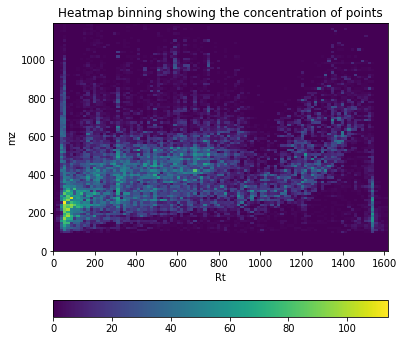

In [29]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)

#sc = plt.scatter(rt_list,mz_list, s = 2)#, c=it_list, cmap=plt.cm.jet)
#heatmap, xedges, yedges = np.histogram2d(rt_list, mz_list, bins=50,range=[[0, 7000], [0, 1400]])
heatmap, xedges, yedges, sc = ax.hist2d(Rts, MZs, bins=100, range=[[0, max(Rts)], [0, max(MZs)]])
cbar = fig.colorbar(sc, orientation='horizontal')    
plt.xlabel("Rt")
plt.ylabel("mz")
plt.title("Heatmap binning showing the concentration of points")
plt.show()

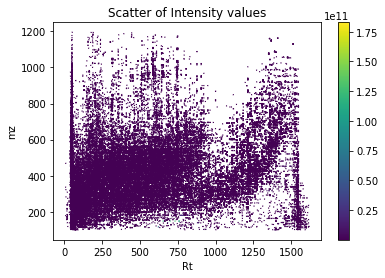

In [30]:
plt.scatter(Rts, MZs, marker='x', s=0.1, linewidths=4, c=INTs)
plt.colorbar()
plt.xlabel("Rt")
plt.ylabel("mz")
plt.title("Scatter of Intensity values")
plt.show()

In [31]:
new_metainfo = pd.DataFrame([], columns=["Sample File Name", "Sample ID", "SampleType", "AssayRole", "Dilution", "Include Sample", "Acquired Time", "Run Order", "Correction Batch", "Class"])
new_metainfo.head()

,Sample File Name,Sample ID,SampleType,AssayRole,Dilution,Include Sample,Acquired Time,Run Order,Correction Batch,Class


In [38]:
new_metainfo["Sample File Name"] = nPYc_input.columns.values[8:]
new_metainfo["Sample ID"] = nPYc_input.columns.values[8:]
st_list = []
ar_list = []
for name in nPYc_input.columns.values[8:]:
    if "QC" in name:
        st_list.append("Study Pool")
        ar_list.append("Precision Reference")
    else:
        st_list.append("Study Sample")
        ar_list.append("Assay")

new_metainfo["Dilution"] = 1
class_list = []
for name in nPYc_input.columns.values[8:]:
    if "pre" in name:
        class_list.append("Pre Surgery")
    elif "QC" in name:
        class_list.append("QC")
    elif "post" in name:
        class_list.append("Post Surgery")
new_metainfo["Class"] = class_list
new_metainfo["Include Sample"] = True
new_metainfo["AssayRole"] = ar_list
new_metainfo["SampleType"] = st_list
at_list = []
for i in range(0,len(nPYc_input.columns.values[8:])):
    at_list.append("2020/04/15 "+str(i+1) +':00')
new_metainfo["Acquired Time"] = at_list
new_metainfo["Run Order"] = np.arange(1,len(nPYc_input.columns.values[8:])+1)
new_metainfo["Correction Batch"] = 1
#new_metainfo = new_metainfo[new_metainfo['Sample ID'].isin(nPYc_input.columns.values)]
new_metainfo

,Sample File Name,Sample ID,SampleType,AssayRole,Dilution,Include Sample,Acquired Time,Run Order,Correction Batch,Class
0,QC_A_neg,QC_A_neg,Study Pool,Precision Reference,1,True,2020/04/15 1:00,1,1,QC
1,QC_A,QC_A,Study Pool,Precision Reference,1,True,2020/04/15 2:00,2,1,QC
2,2_pre_M_A,2_pre_M_A,Study Sample,Assay,1,True,2020/04/15 3:00,3,1,Pre Surgery
3,13_pre_M_A_neg,13_pre_M_A_neg,Study Sample,Assay,1,True,2020/04/15 4:00,4,1,Pre Surgery
4,8_pre_M_A,8_pre_M_A,Study Sample,Assay,1,True,2020/04/15 5:00,5,1,Pre Surgery
5,10_pre_F_A_neg,10_pre_F_A_neg,Study Sample,Assay,1,True,2020/04/15 6:00,6,1,Pre Surgery
6,5_pre_M_A,5_pre_M_A,Study Sample,Assay,1,True,2020/04/15 7:00,7,1,Pre Surgery
7,5_pre_M_A_neg,5_pre_M_A_neg,Study Sample,Assay,1,True,2020/04/15 8:00,8,1,Pre Surgery
8,9_pre_M_A_neg,9_pre_M_A_neg,Study Sample,Assay,1,True,2020/04/15 9:00,9,1,Pre Surgery
9,12_post_M_A,12_post_M_A,Study Sample,Assay,1,True,2020/04/15 10:00,10,1,Post Surgery


In [39]:
new_metainfo.to_csv('MTBLS946_metainfo2.csv', index=False, sep=",")